In [10]:
import pandas as pd

In [11]:
transcript_path = r"C:\Users\ge37voy\.cache\InSituPy\demo_datasets\hbreastcancer\output-XETG00000__slide_id__hbreastcancer\transcripts.csv.gz"

In [12]:
df = pd.read_csv(transcript_path, nrows=10)

In [13]:
df

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281474976710656,565,0,SEC11C,4.395842,328.66647,12.019493,18.662480
1,281474976710657,540,0,NegControlCodeword_0502,5.074415,236.96484,7.608511,18.634956
2,281474976710658,562,0,SEC11C,4.702023,322.79715,12.289083,18.662480
3,281474976710659,271,0,DAPK3,4.906601,581.42865,11.222615,20.821745
4,281474976710660,291,0,TCIM,5.660699,720.85175,9.265523,18.017488
5,281474976710661,297,0,TCIM,5.899098,748.59280,9.818688,18.017488
6,281474976710662,536,0,NKG7,6.249354,219.85414,10.271250,40.000000
7,281474976710663,1089,0,RAPGEF3,7.776000,878.15753,12.464459,20.488186
8,281474976710664,540,0,PPARG,6.397148,232.49571,7.837698,35.338028
9,281474976710665,532,0,RAPGEF3,6.493312,211.36281,10.820307,40.000000


In [14]:
from insitupy.datasets import human_breast_cancer
from insitupy import CACHE

In [15]:
xd = human_breast_cancer()

This dataset exists already. Download is skipped. To force download set `overwrite=True`.
Image exists. Checking md5sum...
The md5sum matches. Download is skipped. To force download set `overwrite=True`.
Image exists. Checking md5sum...
The md5sum matches. Download is skipped. To force download set `overwrite=True`.
Corresponding image data can be found in C:\Users\ge37voy\.cache\InSituPy\demo_datasets\hbreastcancer\unregistered_images
For this dataset following images are available:
slide_id__hbreastcancer__HE__histo.ome.tiff
slide_id__hbreastcancer__CD20_HER2_DAPI__IF.ome.tiff


In [16]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\.cache\InSituPy\demo_datasets\hbreastcancer\output-XETG00000__slide_id__hbreastcancer
Metadata file:	experiment.xenium

In [17]:
xd.load_images()

Loading images...


In [18]:
xd.load_transcripts()

Loading transcripts...


In [21]:
xd.load_cells()

Loading cells...


In [22]:
xdcrop = xd.crop(xlim=(1000,2000), ylim=(1000,2000))

c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [33]:
xdcrop.show()

In [35]:
xdcrop.transcripts

coordinates                        properties             \
                          x           y          z       gene         qv   
transcript_id                                                              
281552286128454    0.171997  539.800171  12.149154       TCIM  40.000000   
281552286128455    0.295227  250.412720  12.533499        LUM  40.000000   
281552286128456    0.241028  170.805420  18.687752        LUM  40.000000   
281552286128457    0.443726  470.886108  15.974704       TCIM  40.000000   
281552286128458    0.493896  306.000000  12.459931      DAPK3  18.236301   
...                     ...         ...        ...        ...        ...   
281616711311494  999.165894  936.406738  19.490503        LUM  16.343029   
281616711311497  999.332642  986.145752  20.001663      HOXD8  40.000000   
281616711311501  999.571289  955.734863  16.592831       SQLE  32.247662   
281616711311508  999.851807  891.873413  18.403030       SQLE  40.000000   
281616711311510  999.974243  916.460938  17.615175   ANKRD30A  40.000000   

                                 cell_id  
                overlaps_nucleus  xenium  
transcript_id                             
281552286128454                0   49651  
281552286128455                0   49907  
281552286128456                0   50708  
281552286128457                0   50407  
281552286128458                0   49882  
...                          ...     ...  
281616711311494                0   74637  
281616711311497                0   74416  
281616711311501                0   74647  
281616711311508                0   74601  
281616711311510                1   74624  

[1584725 rows x 7 columns]

In [37]:
def transform_dataframe(df):
    # data is not changed in place
    df = df.copy()

    # Flatten the MultiIndex columns
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

    # Rename columns to match the desired output
    df = df.rename(columns={
        'coordinates_x': 'x_location',
        'coordinates_y': 'y_location',
        'coordinates_z': 'z_location',
        'properties_gene': 'feature_name',
        'properties_qv': 'qv',
        'properties_overlaps_nucleus': 'overlaps_nucleus',
        'cell_id_xenium': 'cell_id'
    })

    # Add the 'transcript_id' column
    df = df.reset_index()
    #df['transcript_id'] = range(1, len(df) + 1)

    # Reorder columns to match the desired output
    df = df[['transcript_id', 'cell_id', 'overlaps_nucleus', 'feature_name',
             'x_location', 'y_location', 'z_location', 'qv']]

    return df

In [38]:
dfn = transform_dataframe(xdcrop.transcripts)

In [39]:
dfn

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281552286128454,49651,0,TCIM,0.171997,539.800171,12.149154,40.000000
1,281552286128455,49907,0,LUM,0.295227,250.412720,12.533499,40.000000
2,281552286128456,50708,0,LUM,0.241028,170.805420,18.687752,40.000000
3,281552286128457,50407,0,TCIM,0.443726,470.886108,15.974704,40.000000
4,281552286128458,49882,0,DAPK3,0.493896,306.000000,12.459931,18.236301
...,...,...,...,...,...,...,...,...
1584720,281616711311494,74637,0,LUM,999.165894,936.406738,19.490503,16.343029
1584721,281616711311497,74416,0,HOXD8,999.332642,986.145752,20.001663,40.000000
1584722,281616711311501,74647,0,SQLE,999.571289,955.734863,16.592831,32.247662
1584723,281616711311508,74601,0,SQLE,999.851807,891.873413,18.403030,40.000000


In [40]:
dfn.to_csv("../out/transcripts.csv")

## Run Proseg
`proseg --xenium C:\Users\ge37voy\Github\InSituPy\notebooks\out\transcripts.csv`

Output files somehow went into the `dev` folder in which we are here now. Don't know why.

## Read proseg results

In [27]:
import scanpy as sc
import pandas as pd
import geopandas as gpd

In [29]:
count_path = r"C:\Users\ge37voy\Github\InSituPy\notebooks\dev\proseg_results\expected-counts.csv.gz"
cell_metadata_path = r"C:\Users\ge37voy\Github\InSituPy\notebooks\dev\proseg_results\cell-metadata.csv.gz"
transcript_metadata_path = r"C:\Users\ge37voy\Github\InSituPy\notebooks\dev\proseg_results\transcript-metadata.csv.gz"
polygons_path = r"C:\Users\ge37voy\Github\InSituPy\notebooks\dev\proseg_results\cell-polygons.geojson.gz"

adata = sc.read_csv(count_path)
cell_metadata = pd.read_csv(cell_metadata_path)
transcript_metadata = pd.read_csv(transcript_metadata_path)

DriverError: 'C:\Users\ge37voy\Github\InSituPy\notebooks\dev\proseg_results\cell-polygons.geojson.gz' not recognized as a supported file format.

In [31]:
import gzip
with gzip.open(polygons_path, 'rb') as f:
    polygons = gpd.read_file(f)

<Axes: >

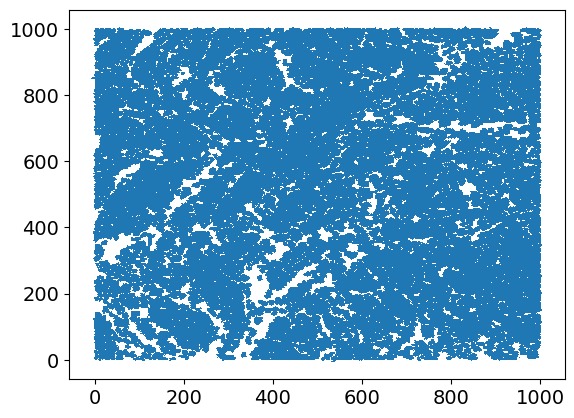

In [34]:
polygons.plot(aspect=None)

In [8]:
adata

AnnData object with n_obs × n_vars = 5990 × 541

In [9]:
cell_metadata

,cell,centroid_x,centroid_y,centroid_z,fov,cluster,volume,population
0,0,607.765440,527.333800,17.462124,0,3,810.14966,101
1,1,576.844850,22.162836,14.517081,0,3,566.88790,270
2,2,936.959300,805.741000,17.217844,0,3,666.79956,148
3,3,283.771060,198.080260,14.678922,0,3,1650.70590,720
4,4,154.912930,266.182600,16.912006,0,0,4502.50800,823
...,...,...,...,...,...,...,...,...
5985,5985,252.107480,439.883180,16.951845,0,3,232.40224,81
5986,5986,997.867000,236.744670,17.029060,0,3,408.33295,98
5987,5987,24.657446,176.742550,14.577488,0,0,510.41632,65
5988,5988,809.787660,836.130100,14.950605,0,3,158.55482,14


In [27]:
df

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
0,281474976710656,565,0,SEC11C,4.395842,328.66647,12.019493,18.662480
1,281474976710657,540,0,NegControlCodeword_0502,5.074415,236.96484,7.608511,18.634956
2,281474976710658,562,0,SEC11C,4.702023,322.79715,12.289083,18.662480
3,281474976710659,271,0,DAPK3,4.906601,581.42865,11.222615,20.821745
4,281474976710660,291,0,TCIM,5.660699,720.85175,9.265523,18.017488
5,281474976710661,297,0,TCIM,5.899098,748.59280,9.818688,18.017488
6,281474976710662,536,0,NKG7,6.249354,219.85414,10.271250,40.000000
7,281474976710663,1089,0,RAPGEF3,7.776000,878.15753,12.464459,20.488186
8,281474976710664,540,0,PPARG,6.397148,232.49571,7.837698,35.338028
9,281474976710665,532,0,RAPGEF3,6.493312,211.36281,10.820307,40.000000
